In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

labels1 = [
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.8,
    0.9,
    1,
]
labels2 = [
    1.1,
    1.2,
    1.3,
    1.4,
    1.5,
]
labels3 = [1.6, 1.7, 1.8, 1.9]
labels4 = [
    2,
    2.1,
    2.2,
    2.3,
]
labels5 = [2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3]



df1 = []
df2 = []
df3 = []
df4 = []
df5 = []
masses1 = []
masses2 = []
masses3 = []
masses4 = []
masses5 = []

for label in labels1:
    masses1 += [label]
    df1 += [pd.read_csv(f"{label}.data", sep="\s+")]
for label in labels2:
    masses2 += [label]
    df2 += [pd.read_csv(f"{label}.data", sep="\s+")]
for label in labels3:
    masses3 += [label]
    df3 += [pd.read_csv(f"{label}.data", sep="\s+")]
for label in labels4:
    masses4 += [label]
    df4 += [pd.read_csv(f"{label}.data", sep="\s+")]
for label in labels5:
    masses5 += [label]
    df5 += [pd.read_csv(f"{label}.data", sep="\s+")]


In [5]:
pred=float(input())

df=[]
masses = []

if 0 < pred <= 1:
    df = df1
    masses=masses1
    labels=labels1
elif 1 < pred < 1.5:
    df = df2
    masses=masses2
    labels=labels2
elif 1.5 <= pred <= 1.9:
    df = df3
    masses=masses3
    labels=labels3

elif 1.9 < pred <= 2.3:
    df = df4
    masses=masses4
    labels=labels4

elif 2.3 < pred <= 3:
    df = df5
    masses=masses5
    labels=labels5



ages = []
lums = []
ages1 = []
lums1 = []
for d in df:
    condition = 10 * d["log_LH"] > 1 * 10 * d["log_L"]
    if condition.any():
        start_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        start_h_burning = None

    condition = d["center_h1"] < 1e-6
    if condition.any():
        end_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        end_h_burning = None

    d = d[(d["star_age"] > start_h_burning) & (d["star_age"] < end_h_burning)]

    ages += [d["star_age"]]
    lums += [d["log_Lneu"]]

for d in df1:
    condition = 10 * d["log_LH"] > 1 * 10 * d["log_L"]
    if condition.any():
        start_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        start_h_burning = None

    condition = d["center_h1"] < 1e-6
    if condition.any():
        end_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        end_h_burning = None

    d = d[(d["star_age"] > start_h_burning) & (d["star_age"] < end_h_burning)]

    ages1 += [d["star_age"]]
    lums1 += [d["log_Lneu"]]

min_length = min(len(lum) for lum in lums)
ages = np.log([age[:min_length] for age in ages])
lums = np.array([lum[:min_length] for lum in lums])

min_length = min(len(lum) for lum in lums1)
ages1 = np.log([age[:min_length] for age in ages1])
lums1 = np.array([lum[:min_length] for lum in lums1])

In [6]:
from sklearn.linear_model import LinearRegression as LnR

output = np.array(
    [
        *(i for z in zip(ages.T, lums.T) for i in z),
    ]
).T
print(output.shape)
model = LnR()
model.fit(np.array([masses]).T, output)

(10, 2314)


LinearRegression()

(1, 2314)


NameError: name 'labels' is not defined

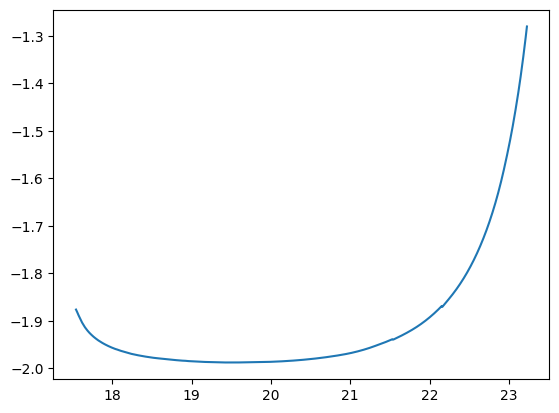

In [7]:
# n = -2
# prediction = model.predict([[masses[n]]])
prediction = model.predict([[pred]])
predicted_ages = prediction[:, ::2]
predicted_lums = prediction[:, 1::2]
print(prediction.shape)

plt.plot(predicted_ages[0], predicted_lums[0], label=f"predicted {pred}")

# plt.plot(ages[n], lums[n], label="real")
# plt.plot(ages[1], lums[1], label="grid")
# plt.plot(ages[2], lums[2], label="grid 0.4")
# plt.xscale("log")

for i, label in enumerate(labels):
    plt.plot(ages1[i], lums1[i], label=f"grid {label}")
# plt.plot(ages1[-2], lums1[-2], label=f"grid {2.9}")
plt.ylabel('Luminosity')
plt.xlabel('Star Age')
plt.legend(fontsize=6)

In [ ]:
def Flux(L, r):
    return L / (4 * np.pi * r**2)

